🚀 KEÇECİ LAYOUT - ADVANCED VISUALIZATION
Features: Directed/Undirected graphs, Curved, Helix, 3D
Graphillion full support - unlimited nodes

LIBRARY STATUS
NetworkX        ✓ INSTALLED
RustworkX       ✓ INSTALLED
igraph          ✓ INSTALLED
Networkit       ✓ INSTALLED
Graphillion     ✓ INSTALLED
Graph Tool      ✓ INSTALLED

KEÇECİ LAYOUT - ADVANCED MENU
1. Single Library Test
2. Compare All Libraries
3. Style Comparison
4. Show Library Status
0. Exit


Main menu selection (0-4):  2



Comparing all libraries...
NetworkX... ✓ NetworkX: 6 nodes, 5 edges
✓ Keçeci Layout successful: 6 nodes
✓
RustworkX... ✓ RustworkX: 6 nodes, 5 edges
✓ Keçeci Layout successful: 6 nodes
✓
igraph... ✓ igraph: 6 nodes, 5 edges
✓ Keçeci Layout successful: 6 nodes
✓
Networkit... ✓ Networkit: 6 nodes, 5 edges
✓ Keçeci Layout successful: 6 nodes
✓
Graphillion... ✓ Graphillion: 6 node universe, 5 edges
✓ Keçeci Layout successful: 6 nodes
✓
Graph Tool... ✓ graph-tool: 6 nodes, 5 edges
✓ Keçeci Layout successful: 6 nodes
✓


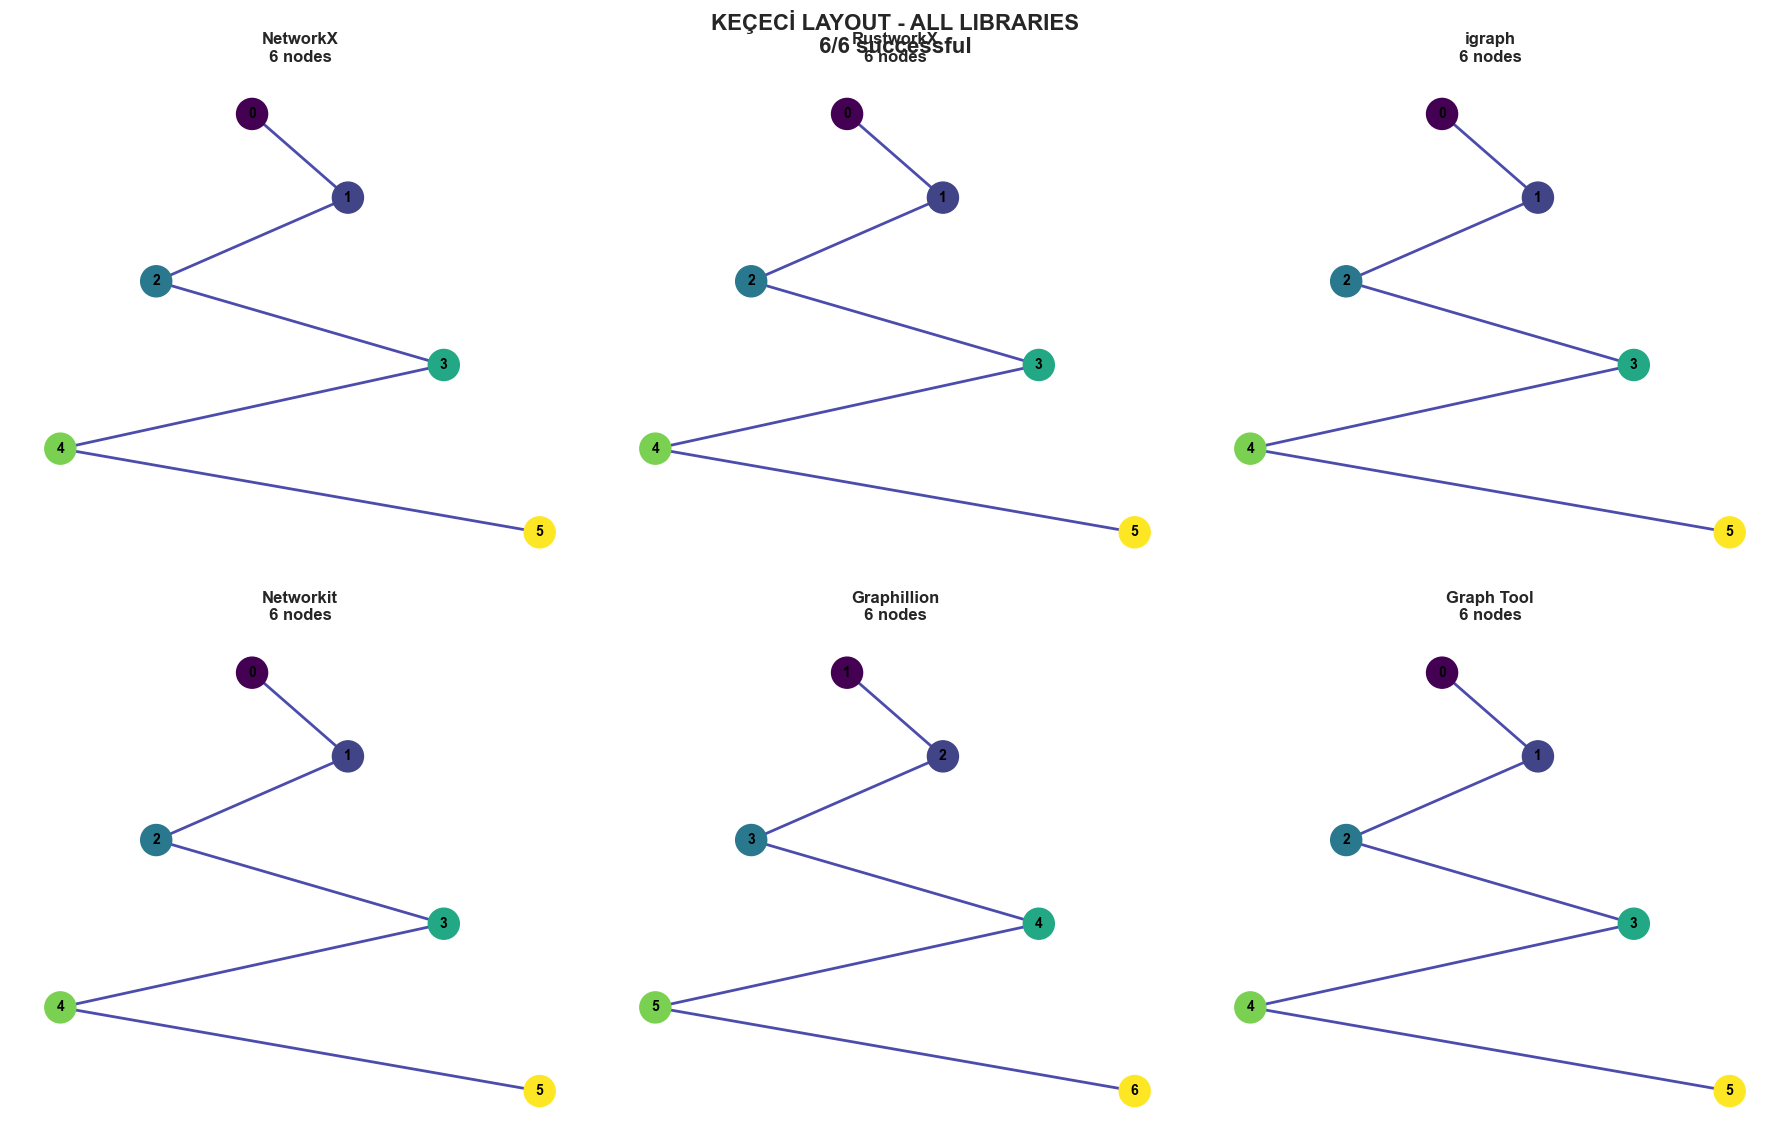


KEÇECİ LAYOUT - ADVANCED MENU
1. Single Library Test
2. Compare All Libraries
3. Style Comparison
4. Show Library Status
0. Exit


Main menu selection (0-4):  3



Comparing styles...
✓ NetworkX: 6 nodes, 5 edges
✓ Keçeci Layout successful: 6 nodes
✓ Keçeci Layout successful: 6 nodes
✓ Keçeci Layout successful: 6 nodes
✓ Keçeci Layout successful: 6 nodes
✓ Keçeci Layout successful: 6 nodes


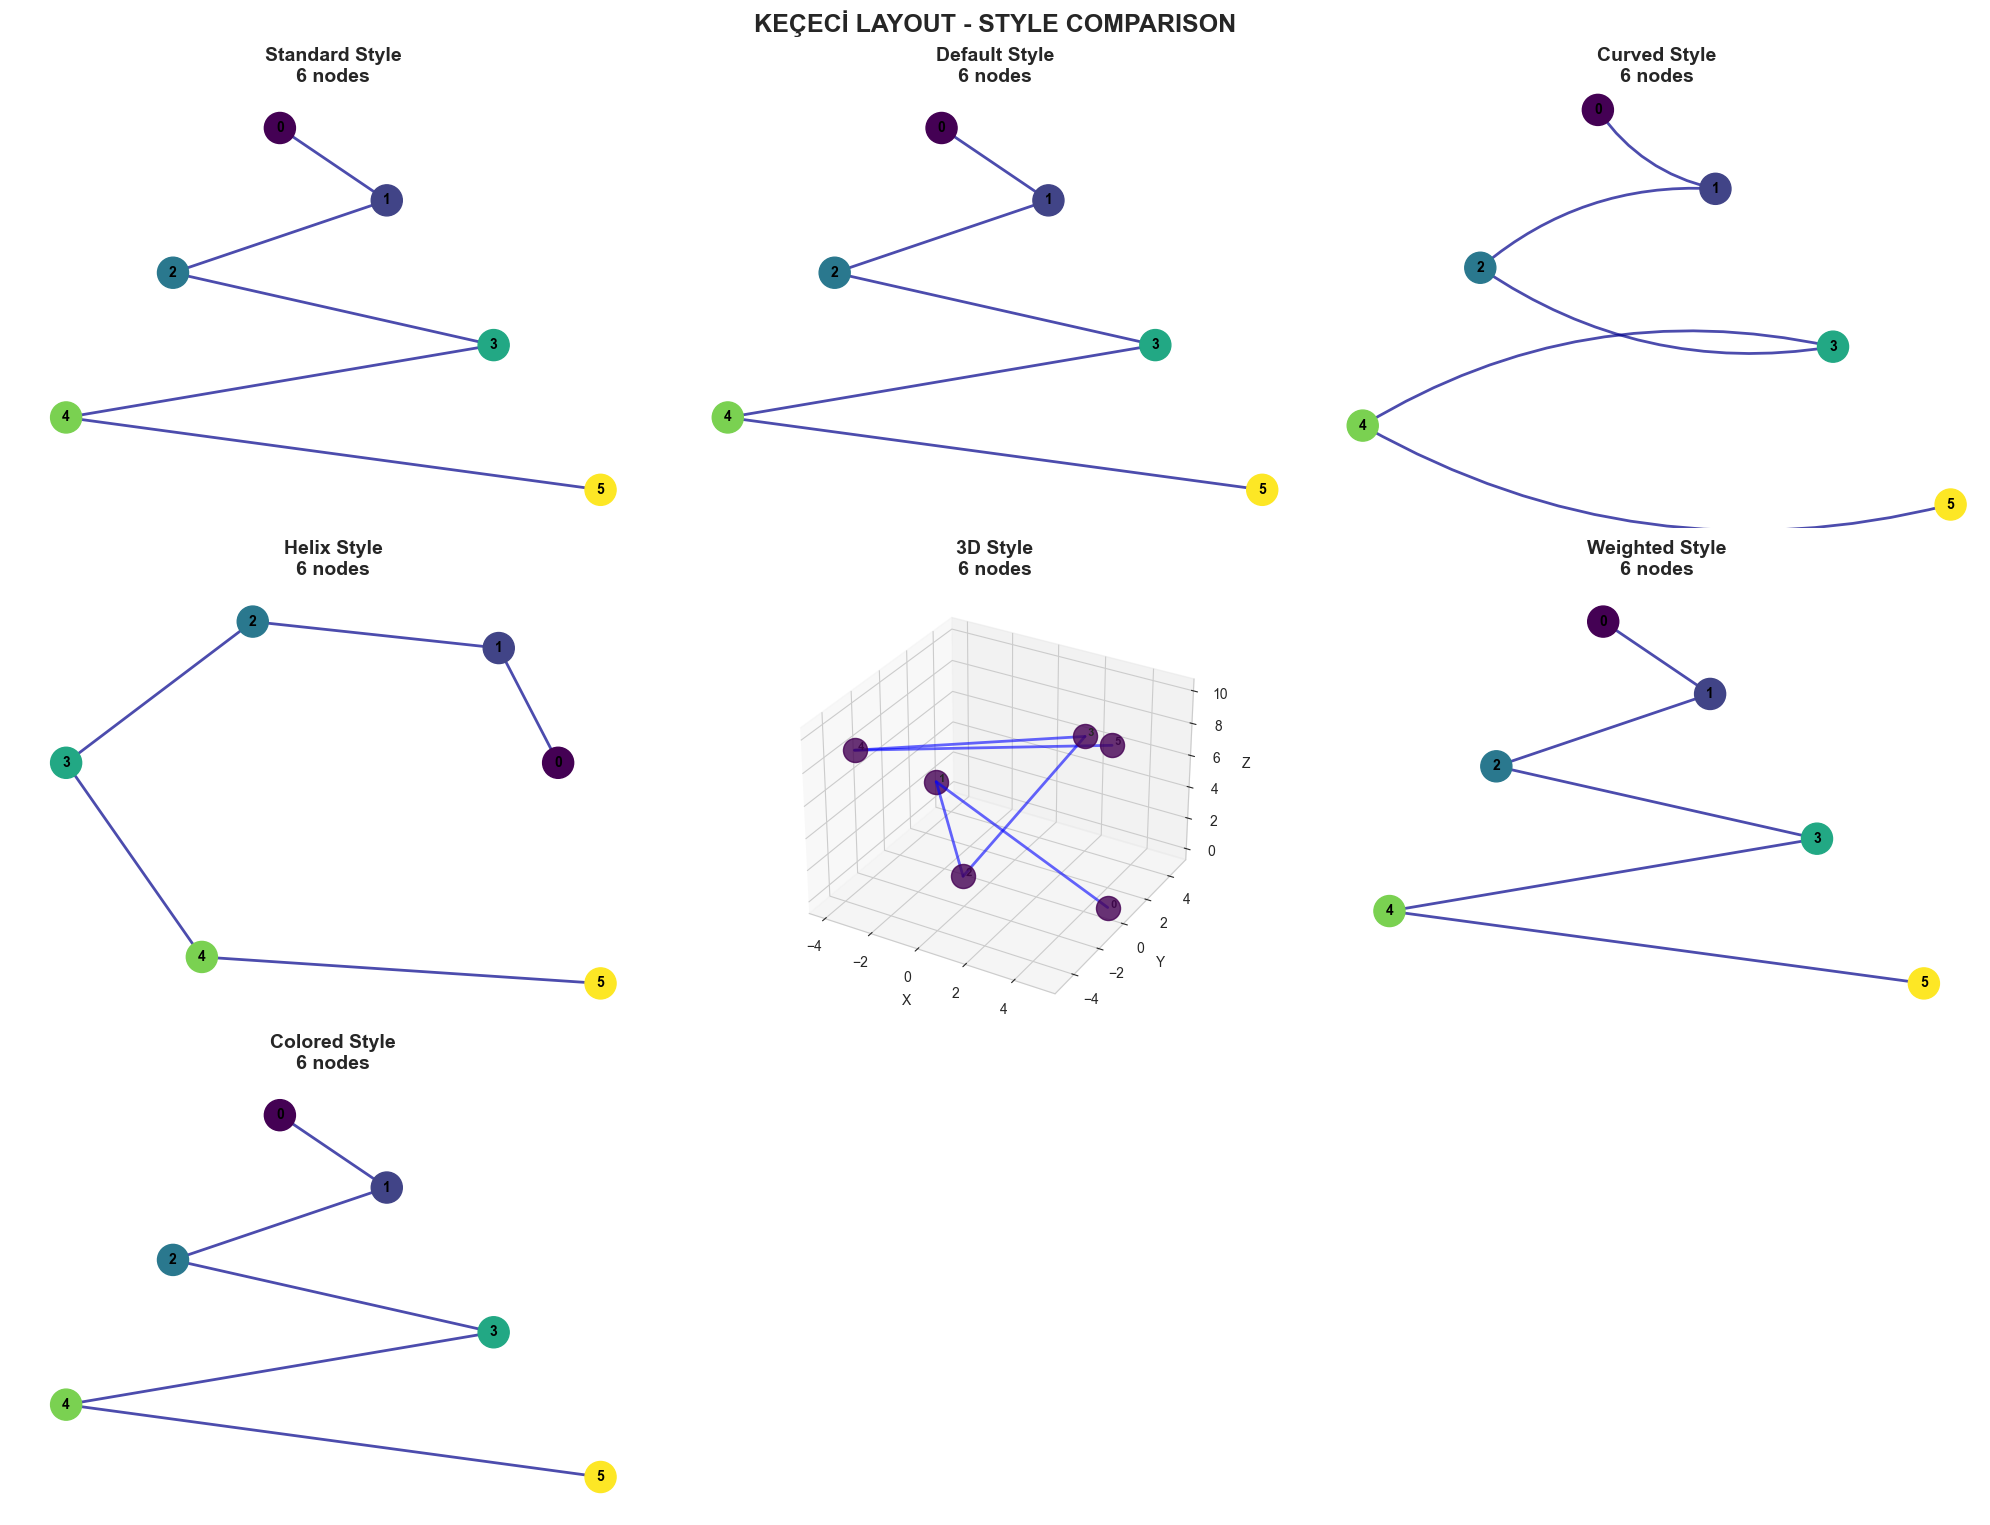


KEÇECİ LAYOUT - ADVANCED MENU
1. Single Library Test
2. Compare All Libraries
3. Style Comparison
4. Show Library Status
0. Exit


Main menu selection (0-4):  4



LIBRARY STATUS
NetworkX        ✓ INSTALLED
RustworkX       ✓ INSTALLED
igraph          ✓ INSTALLED
Networkit       ✓ INSTALLED
Graphillion     ✓ INSTALLED
Graph Tool      ✓ INSTALLED

KEÇECİ LAYOUT - ADVANCED MENU
1. Single Library Test
2. Compare All Libraries
3. Style Comparison
4. Show Library Status
0. Exit


Main menu selection (0-4):  1



SINGLE LIBRARY TEST
1. NetworkX
2. RustworkX
3. igraph
4. Networkit
5. Graphillion
6. Graph Tool
0. Return to Main Menu


Select library (0-6):  6



DIRECTION OPTIONS
1. Undirected - Bidirectional edges
2. Directed   - Arrow-headed edges


Select direction (1-2, default: 1):  



PLOTTING STYLES
1. Standard    - Straight edges
2. Default     - Straight edges
3. Curved      - Curved edges
4. Helix       - Spiral layout
5. 3D          - Three-dimensional helix
6. Weighted    - Weighted edges
7. Colored     - Colored nodes


Select style (1-7, default: 1):  



--- Graph Tool Test (Undirected, STANDARD style) ---


Number of nodes (default: 8):  
Primary spacing (default: 1.0):  
Secondary spacing (default: 0.6):  


Layout direction: 1.top_down 2.bottom_up 3.left-right 4.right-left


Selection (1-4, default: 1):  


✓ graph-tool: 8 nodes, 7 edges
✓ Keçeci Layout successful: 8 nodes


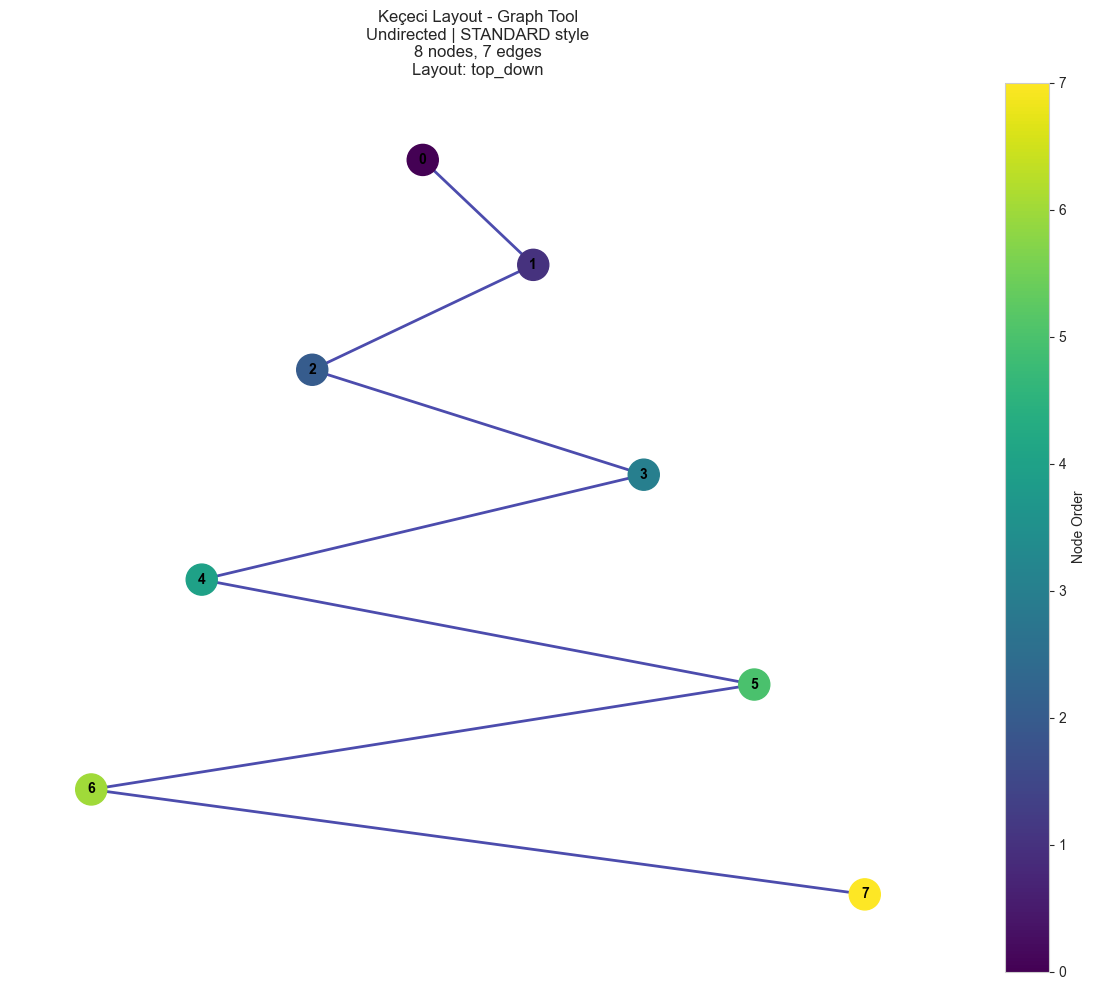


KEÇECİ LAYOUT - ADVANCED MENU
1. Single Library Test
2. Compare All Libraries
3. Style Comparison
4. Show Library Status
0. Exit


Main menu selection (0-4):  0


Terminating program...


In [1]:
import igraph as ig
import kececilayout as kl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import networkx as nx
import networkit as nk
import numpy as np
import platform
import rustworkx as rx
from typing import Any, Dict, List, Optional, Tuple, Union
import warnings

# Import graph-tool only on Linux
if platform.system() == "Linux":
    try:
        import graph_tool.all as gt
        GRAPH_TOOL_AVAILABLE = True
    except ImportError:
        gt = None
        GRAPH_TOOL_AVAILABLE = False
else:
    gt = None
    GRAPH_TOOL_AVAILABLE = False

# Conditionally import Graphillion
try:
    import graphillion as gg
    from graphillion import GraphSet
    import itertools
    GRAPHILLION_AVAILABLE = True
except ImportError:
    GRAPHILLION_AVAILABLE = False

def generate_sample_graph(library_type: int, n_nodes: int = 10, directed: bool = False) -> Any:
    """Generates a sample graph based on the selected library type."""
    if library_type == 1:  # NetworkX
        if directed:
            G = nx.DiGraph()
            for i in range(n_nodes - 1):
                G.add_edge(i, i+1)
        else:
            G = nx.path_graph(n_nodes)
        print(f"✓ NetworkX: {G.number_of_nodes()} nodes, {G.number_of_edges()} edges")
        return G

    elif library_type == 2:  # RustworkX
        if directed:
            G = rx.PyDiGraph()
            nodes = G.add_nodes_from(range(n_nodes))
            for i in range(n_nodes - 1):
                G.add_edge(i, i+1, None)
        else:
            G = rx.generators.path_graph(n_nodes)
        print(f"✓ RustworkX: {G.num_nodes()} nodes, {G.num_edges()} edges")
        return G

    elif library_type == 3:  # igraph
        G = ig.Graph.Ring(n_nodes, directed=directed, circular=False)
        print(f"✓ igraph: {G.vcount()} nodes, {G.ecount()} edges")
        return G

    elif library_type == 4:  # Networkit
        if directed:
            G = nk.graph.Graph(n_nodes, weighted=False, directed=True)
        else:
            G = nk.graph.Graph(n_nodes, weighted=False, directed=False)
        for i in range(n_nodes - 1):
            G.addEdge(i, i+1)
        print(f"✓ Networkit: {G.numberOfNodes()} nodes, {G.numberOfEdges()} edges")
        return G

    elif library_type == 5:  # Graphillion
        if not GRAPHILLION_AVAILABLE:
            print("✗ Graphillion not available, using NetworkX fallback")
            return nx.path_graph(min(n_nodes, 5))

        try:
            universe = [(i, i+1) for i in range(1, n_nodes)]
            GraphSet.set_universe(universe)
            gs = GraphSet()
            print(f"✓ Graphillion: {n_nodes} node universe, {len(universe)} edges")
            return gs
        except Exception as e:
            print(f"✗ Graphillion error: {e} - using NetworkX fallback")
            return nx.path_graph(min(n_nodes, 5))

    elif library_type == 6:  # graph-tool
        if not GRAPH_TOOL_AVAILABLE:
            print("✗ Graph-tool not available, using NetworkX fallback")
            return nx.path_graph(min(n_nodes, 5))

        try:
            G = gt.Graph(directed=directed)
            G.add_vertex(n_nodes)
            for i in range(n_nodes - 1):
                G.add_edge(G.vertex(i), G.vertex(i+1))
            print(f"✓ graph-tool: {G.num_vertices()} nodes, {G.num_edges()} edges")
            return G
        except Exception as e:
            print(f"✗ graph-tool error: {e} - using NetworkX fallback")
            return nx.path_graph(min(n_nodes, 5))

def get_secondary_start(primary_direction: str) -> str:
    """Determines secondary start direction based on primary direction."""
    if primary_direction in ['top_down', 'bottom_up']:
        return 'right'
    elif primary_direction in ['left-to-right', 'right-to-left']:
        return 'up'
    else:
        return 'right'

def convert_to_networkx(graph: Any, library_type: int, directed: bool = False) -> nx.Graph:
    """Converts graphs from different libraries to NetworkX."""
    if graph is None:
        if directed:
            return nx.DiGraph([(1, 2), (2, 3)])
        else:
            return nx.path_graph(3)

    try:
        if library_type == 1:  # NetworkX
            return graph

        elif library_type == 2:  # RustworkX
            if directed:
                nx_graph = nx.DiGraph()
            else:
                nx_graph = nx.Graph()
            nx_graph.add_nodes_from(graph.node_indices())
            if hasattr(graph, 'edge_list'):
                nx_graph.add_edges_from(graph.edge_list())
            return nx_graph

        elif library_type == 3:  # igraph
            if directed:
                nx_graph = nx.DiGraph()
            else:
                nx_graph = nx.Graph()
            nx_graph.add_nodes_from([v.index for v in graph.vs])
            nx_graph.add_edges_from(graph.get_edgelist())
            return nx_graph

        elif library_type == 4:  # Networkit
            if directed:
                nx_graph = nx.DiGraph()
            else:
                nx_graph = nx.Graph()
            n_nodes = graph.numberOfNodes()
            nx_graph.add_nodes_from(range(n_nodes))
            for u, v in graph.iterEdges():
                nx_graph.add_edge(u, v)
            return nx_graph

        elif library_type == 5:  # Graphillion
            if directed:
                nx_graph = nx.DiGraph()
            else:
                nx_graph = nx.Graph()
            try:
                if hasattr(graph, 'universe'):
                    edges = list(graph.universe())
                else:
                    edges = []

                if edges:
                    all_nodes = set()
                    for edge in edges:
                        all_nodes.update(edge)
                    nx_graph.add_nodes_from(sorted(all_nodes))
                    nx_graph.add_edges_from(edges)
                else:
                    if n_nodes > 1:
                        simple_edges = [(i, i+1) for i in range(1, min(n_nodes, 100))]
                        if simple_edges:
                            all_nodes = set()
                            for edge in simple_edges:
                                all_nodes.update(edge)
                            nx_graph.add_nodes_from(sorted(all_nodes))
                            nx_graph.add_edges_from(simple_edges)

                if nx_graph.number_of_nodes() == 0:
                    nx_graph.add_edges_from([(1, 2), (2, 3)])
                return nx_graph
            except Exception as e:
                print(f"✗ Graphillion conversion error: {e} - using simple graph")
                return nx.path_graph(5)

        elif library_type == 6:  # graph-tool
            if directed:
                nx_graph = nx.DiGraph()
            else:
                nx_graph = nx.Graph()
            try:
                for v in graph.vertices():
                    nx_graph.add_node(int(v))
                for e in graph.edges():
                    nx_graph.add_edge(int(e.source()), int(e.target()))
                return nx_graph
            except Exception as e:
                print(f"✗ graph-tool conversion error: {e} - using simple graph")
                return nx.path_graph(5)

    except Exception as e:
        print(f"✗ Conversion error: {e} - using simple graph")
        if directed:
            return nx.DiGraph([(1, 2), (2, 3)])
        else:
            return nx.path_graph(3)

def safe_kececi_layout(nx_graph: nx.Graph, layout_params: Dict) -> Dict:
    """Safe Keçeci Layout - Graphillion compatible."""
    try:
        if nx_graph.number_of_nodes() == 0:
            nx_graph = nx.path_graph(3)

        pos = kl.kececi_layout(nx_graph, **layout_params)
        print(f"✓ Keçeci Layout successful: {len(pos)} nodes")
        return pos

    except Exception as e:
        print(f"✗ Keçeci Layout error: {e} - using circular layout")
        return nx.circular_layout(nx_graph)

def generate_3d_helix_layout(nx_graph: nx.Graph, z_spacing: float = 2.0, radius: float = 5.0, turns: float = 2.0) -> Dict:
    """Creates 3D helix layout."""
    nodes = sorted(list(nx_graph.nodes()))
    pos_3d = {}
    total_nodes = len(nodes)

    if total_nodes == 0:
        return pos_3d

    total_angle = 2 * np.pi * turns
    for i, node_id in enumerate(nodes):
        z = i * z_spacing
        angle = (i / (total_nodes - 1)) * total_angle if total_nodes > 1 else 0
        x = np.cos(angle) * radius
        y = np.sin(angle) * radius
        pos_3d[node_id] = (x, y, z)

    return pos_3d

def draw_edges_with_arrows(nx_graph: nx.Graph, pos: Dict, ax: plt.Axes, edge_style: str = 'standard', directed: bool = False) -> None:
    """Draws edges with arrowheads."""
    with warnings.catch_warnings():
        warnings.simplefilter('ignore', category=UserWarning)

        if edge_style == 'curved' and directed:
            for edge in nx_graph.edges():
                u, v = edge
                if u in pos and v in pos:
                    arrowprops = dict(
                        arrowstyle='->',
                        color='darkblue',
                        lw=2,
                        alpha=0.7,
                        shrinkA=15,
                        shrinkB=15,
                        connectionstyle='arc3,rad=0.2'
                    )
                    ax.annotate("", xy=pos[v], xycoords='data',
                               xytext=pos[u], textcoords='data',
                               arrowprops=arrowprops)

        elif edge_style == 'curved' and not directed:
            for edge in nx_graph.edges():
                u, v = edge
                if u in pos and v in pos:
                    from matplotlib.patches import FancyArrowPatch
                    arrow = FancyArrowPatch(pos[u], pos[v],
                                          connectionstyle='arc3,rad=0.2',
                                          color='darkblue', alpha=0.7, lw=2,
                                          arrowstyle='-')
                    ax.add_patch(arrow)

        elif directed:
            nx.draw_networkx_edges(
                nx_graph, pos,
                width=2,
                alpha=0.7,
                edge_color='darkred',
                arrows=True,
                arrowsize=20,
                arrowstyle='->',
                ax=ax
            )

        else:
            nx.draw_networkx_edges(
                nx_graph, pos,
                width=2,
                alpha=0.7,
                edge_color='darkblue',
                arrows=False,
                ax=ax
            )

def plot_with_kececi_layout(graph: Any, library_type: int, layout_params: Dict, ax: plt.Axes, style: str = 'standard', directed: bool = False) -> Tuple:
    """Plots graph with Keçeci Layout."""
    nx_graph = convert_to_networkx(graph, library_type, directed)

    if nx_graph.number_of_nodes() < 2:
        if directed:
            nx_graph = nx.DiGraph([(1, 2), (2, 3), (3, 4)])
        else:
            nx_graph = nx.path_graph(4)

    edge_style = 'standard'
    if style == 'curved':
        edge_style = 'curved'
    elif style == '3d':
        edge_style = 'standard'

    if style == '3d':
        pos_3d = generate_3d_helix_layout(nx_graph)
        node_colors = list(range(len(nx_graph.nodes())))

        for i, node_id in enumerate(sorted(nx_graph.nodes())):
            if node_id in pos_3d:
                x, y, z = pos_3d[node_id]
                ax.scatter([x], [y], [z],
                          s=300,
                          c=[node_colors[i]],
                          cmap='viridis',
                          alpha=0.8,
                          depthshade=True)

                ax.text(x, y, z, f' {node_id}', fontsize=8, fontweight='bold')

        for u, v in nx_graph.edges():
            if u in pos_3d and v in pos_3d:
                x_vals = [pos_3d[u][0], pos_3d[v][0]]
                y_vals = [pos_3d[u][1], pos_3d[v][1]]
                z_vals = [pos_3d[u][2], pos_3d[v][2]]
                ax.plot(x_vals, y_vals, z_vals,
                       color='blue', alpha=0.6, linewidth=2)

        scatter = ax.scatter([], [], [], c=[], cmap='viridis')
        return scatter, nx_graph, pos_3d

    elif style == 'helix':
        nodes = sorted(list(nx_graph.nodes()))
        pos = {}

        for i, node_id in enumerate(nodes):
            angle = i * (2 * np.pi / len(nodes))
            radius = 1.0 + (i * 0.3)
            x = radius * np.cos(angle)
            y = radius * np.sin(angle)
            pos[node_id] = (x, y)

    else:
        primary_direction = layout_params.get('primary_direction', 'top_down')
        layout_params['secondary_start'] = get_secondary_start(primary_direction)

        pos = safe_kececi_layout(nx_graph, layout_params)

    node_colors = list(range(len(nx_graph.nodes())))
    nodes_viz = nx.draw_networkx_nodes(
        nx_graph, pos,
        node_color=node_colors,
        node_size=500,
        cmap='viridis',
        ax=ax
    )

    draw_edges_with_arrows(nx_graph, pos, ax, edge_style, directed)

    nx.draw_networkx_labels(nx_graph, pos, font_size=10, font_weight='bold', ax=ax)

    return nodes_viz, nx_graph, pos

def plot_3d_graph(graph: Any, library_type: int, layout_params: Dict, ax: plt.Axes) -> Tuple:
    """3D plotting."""
    nx_graph = convert_to_networkx(graph, library_type)

    if nx_graph.number_of_nodes() < 2:
        nx_graph = nx.path_graph(4)

    pos_3d = generate_3d_helix_layout(nx_graph)

    node_colors = list(range(len(nx_graph.nodes())))

    for node_id, (x, y, z) in pos_3d.items():
        ax.scatter([x], [y], [z],
                  s=300,
                  c=[node_colors[node_id]],
                  cmap='viridis',
                  alpha=0.8,
                  depthshade=True)

        ax.text(x, y, z, f' {node_id}', fontsize=8, fontweight='bold')

    for u, v in nx_graph.edges():
        if u in pos_3d and v in pos_3d:
            x_vals = [pos_3d[u][0], pos_3d[v][0]]
            y_vals = [pos_3d[u][1], pos_3d[v][1]]
            z_vals = [pos_3d[u][2], pos_3d[v][2]]
            ax.plot(x_vals, y_vals, z_vals,
                   color='blue', alpha=0.6, linewidth=2)

    scatter = ax.scatter([], [], [], c=[], cmap='viridis')

    return scatter, nx_graph, pos_3d

def show_library_status() -> None:
    """Shows library status."""
    print("\n" + "="*50)
    print("LIBRARY STATUS")
    print("="*50)

    libraries = [
        ("NetworkX", True),
        ("RustworkX", True),
        ("igraph", True),
        ("Networkit", True),
        ("Graphillion", GRAPHILLION_AVAILABLE),
        ("Graph Tool", GRAPH_TOOL_AVAILABLE)
    ]

    for lib_name, available in libraries:
        status = "✓ INSTALLED" if available else "✗ NOT INSTALLED"
        print(f"{lib_name:<15} {status}")

def show_style_options() -> None:
    """Shows plotting styles."""
    print("\n" + "="*40)
    print("PLOTTING STYLES")
    print("="*40)
    print("1. Standard    - Straight edges")
    print("2. Default     - Straight edges")
    print("3. Curved      - Curved edges")
    print("4. Helix       - Spiral layout")
    print("5. 3D          - Three-dimensional helix")
    print("6. Weighted    - Weighted edges")
    print("7. Colored     - Colored nodes")
    print("="*40)

def show_direction_options() -> None:
    """Shows direction options."""
    print("\n" + "="*40)
    print("DIRECTION OPTIONS")
    print("="*40)
    print("1. Undirected - Bidirectional edges")
    print("2. Directed   - Arrow-headed edges")
    print("="*40)

def interactive_graph_menu() -> None:
    """Interactive graph library selection menu."""
    while True:
        print("\n" + "="*60)
        print("KEÇECİ LAYOUT - ADVANCED MENU")
        print("="*60)
        print("1. Single Library Test")
        print("2. Compare All Libraries")
        print("3. Style Comparison")
        print("4. Show Library Status")
        print("0. Exit")
        print("="*60)

        try:
            main_choice = int(input("Main menu selection (0-4): "))

            if main_choice == 0:
                print("Terminating program...")
                break
            elif main_choice == 1:
                single_library_test()
            elif main_choice == 2:
                compare_all_libraries()
            elif main_choice == 3:
                compare_styles()
            elif main_choice == 4:
                show_library_status()
            else:
                print("Invalid selection! Please enter a number between 0-4.")

        except ValueError:
            print("Please enter a valid number!")

def single_library_test() -> None:
    """Single library test."""
    print("\n" + "="*50)
    print("SINGLE LIBRARY TEST")
    print("="*50)
    print("1. NetworkX")
    print("2. RustworkX")
    print("3. igraph")
    print("4. Networkit")

    if GRAPHILLION_AVAILABLE:
        print("5. Graphillion")
        max_choice = 6 if GRAPH_TOOL_AVAILABLE else 5
    else:
        print("5. Graphillion (Not Available)")
        max_choice = 5 if GRAPH_TOOL_AVAILABLE else 4

    if GRAPH_TOOL_AVAILABLE:
        print("6. Graph Tool")
    else:
        print("6. Graph Tool (Not Available)")

    print("0. Return to Main Menu")

    try:
        choice = int(input(f"Select library (0-{max_choice}): "))

        if choice == 0:
            return
        elif choice in [1, 2, 3, 4]:
            pass
        elif choice == 5 and GRAPHILLION_AVAILABLE:
            pass
        elif choice == 6 and GRAPH_TOOL_AVAILABLE:
            pass
        else:
            print(f"Invalid selection! Please enter a number between 0-{max_choice}.")
            return

        default_nodes = 8

        show_direction_options()
        dir_choice = int(input("Select direction (1-2, default: 1): ") or 1)
        directed = (dir_choice == 2)

        show_style_options()
        style_choice = int(input("Select style (1-7, default: 1): ") or 1)
        styles = ['standard', 'default', 'curved', 'helix', '3d', 'weighted', 'colored']
        selected_style = styles[style_choice - 1] if 1 <= style_choice <= 7 else 'standard'

        library_names = {
            1: 'NetworkX',
            2: 'RustworkX',
            3: 'igraph',
            4: 'Networkit',
            5: 'Graphillion',
            6: 'Graph Tool'
        }

        direction_text = "Directed" if directed else "Undirected"
        print(f"\n--- {library_names[choice]} Test ({direction_text}, {selected_style.upper()} style) ---")

        n_nodes = int(input(f"Number of nodes (default: {default_nodes}): ") or default_nodes)

        primary_spacing = float(input("Primary spacing (default: 1.0): ") or 1.0)
        secondary_spacing = float(input("Secondary spacing (default: 0.6): ") or 0.6)

        if selected_style != '3d':
            print("Layout direction: 1.top_down 2.bottom_up 3.left-right 4.right-left")
            dir_choice = int(input("Selection (1-4, default: 1): ") or 1)
            directions = ['top_down', 'bottom_up', 'left-to-right', 'right-to-left']
            primary_direction = directions[dir_choice - 1] if 1 <= dir_choice <= 4 else 'top_down'
        else:
            primary_direction = 'top_down'

        layout_params = {
            'primary_spacing': primary_spacing,
            'secondary_spacing': secondary_spacing,
            'primary_direction': primary_direction,
            'expanding': True
        }

        graph = generate_sample_graph(choice, n_nodes, directed)

        if selected_style == '3d':
            fig = plt.figure(figsize=(12, 10))
            ax = fig.add_subplot(111, projection='3d')
        else:
            fig, ax = plt.subplots(figsize=(12, 10))

        nodes, nx_graph, pos = plot_with_kececi_layout(
            graph, choice, layout_params, ax, selected_style, directed
        )

        if nodes is not None and selected_style != '3d':
            plt.colorbar(nodes, ax=ax, label='Node Order')
        elif selected_style == '3d':
            plt.colorbar(nodes, ax=ax, label='Node Order')

        title = f'Keçeci Layout - {library_names[choice]}\n'
        title += f'{direction_text} | {selected_style.upper()} style\n'
        title += f'{nx_graph.number_of_nodes()} nodes, {nx_graph.number_of_edges()} edges'

        if selected_style != '3d':
            title += f'\nLayout: {primary_direction}'

        ax.set_title(title, fontsize=12)

        if selected_style != '3d':
            ax.axis('off')
        else:
            ax.set_xlabel('X')
            ax.set_ylabel('Y')
            ax.set_zlabel('Z')

        plt.tight_layout()
        plt.show()

    except ValueError:
        print("Please enter a valid number!")
    except Exception as e:
        print(f"Error: {e}")

def compare_directed_undirected() -> None:
    """Compares directed and undirected graphs."""
    print("\nComparing directed/undirected...")

    library_type = 1  # Use NetworkX
    n_nodes = 6

    fig, axes = plt.subplots(1, 2, figsize=(16, 8))

    layout_params = {
        'primary_spacing': 1.0,
        'secondary_spacing': 0.6,
        'primary_direction': 'top_down',
        'expanding': True
    }

    undirected_graph = generate_sample_graph(library_type, n_nodes, directed=False)
    nodes_undir, nx_graph_undir, pos_undir = plot_with_kececi_layout(
        undirected_graph, library_type, layout_params, axes[0], 'standard', False
    )
    axes[0].set_title('Undirected Graph\nBidirectional edges',
                     fontsize=14, fontweight='bold')
    axes[0].axis('off')

    directed_graph = generate_sample_graph(library_type, n_nodes, directed=True)
    nodes_dir, nx_graph_dir, pos_dir = plot_with_kececi_layout(
        directed_graph, library_type, layout_params, axes[1], 'standard', True
    )
    axes[1].set_title('Directed Graph\nArrow-headed edges',
                     fontsize=14, fontweight='bold')
    axes[1].axis('off')

    plt.suptitle('DIRECTED AND UNDIRECTED GRAPHS COMPARISON',
                 fontsize=16, fontweight='bold', y=0.95)
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.show()

def compare_styles() -> None:
    """Compares different styles."""
    print("\nComparing styles...")

    library_type = 1  # Use NetworkX
    n_nodes = 6
    graph = generate_sample_graph(library_type, n_nodes)

    styles = ['standard', 'default', 'curved', 'helix', '3d', 'weighted', 'colored']
    style_names = ['Standard', 'Default', 'Curved', 'Helix', '3D', 'Weighted', 'Colored']

    fig = plt.figure(figsize=(20, 16))

    layout_params = {
        'primary_spacing': 1.0,
        'secondary_spacing': 0.6,
        'primary_direction': 'top_down',
        'expanding': True
    }

    for idx, (style, style_name) in enumerate(zip(styles, style_names)):
        if style == '3d':
            ax = fig.add_subplot(3, 3, idx+1, projection='3d')
        else:
            ax = fig.add_subplot(3, 3, idx+1)

        try:
            nodes, nx_graph, pos = plot_with_kececi_layout(graph, library_type, layout_params, ax, style)

            ax.set_title(f'{style_name} Style\n{nx_graph.number_of_nodes()} nodes',
                        fontsize=14, fontweight='bold')

            if style != '3d':
                ax.axis('off')
            else:
                ax.set_xlabel('X')
                ax.set_ylabel('Y')
                ax.set_zlabel('Z')

        except Exception as e:
            print(f"{style_name} style error: {e}")
            ax.clear()
            ax.text(0.5, 0.5, f'{style_name}\nERROR', ha='center', va='center', fontsize=12, color='red', weight='bold')
            ax.set_title(f'{style_name} - Error', fontsize=12)
            if style != '3d':
                ax.axis('off')

    plt.suptitle('KEÇECİ LAYOUT - STYLE COMPARISON', fontsize=18, fontweight='bold', y=0.95)
    plt.tight_layout()
    plt.subplots_adjust(top=0.90)
    plt.show()

def compare_all_libraries() -> None:
    """Compares all libraries."""
    print("\nComparing all libraries...")

    libraries = []
    if GRAPHILLION_AVAILABLE:
        libraries = [(1, 'NetworkX'), (2, 'RustworkX'), (3, 'igraph'), (4, 'Networkit'), (5, 'Graphillion')]
    else:
        libraries = [(1, 'NetworkX'), (2, 'RustworkX'), (3, 'igraph'), (4, 'Networkit')]

    if GRAPH_TOOL_AVAILABLE:
        libraries.append((6, 'Graph Tool'))

    n_nodes = 6
    layout_params = {'primary_spacing': 1.0, 'secondary_spacing': 0.6, 'primary_direction': 'top_down', 'expanding': True}

    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.flatten()

    successful_plots = 0

    for idx, (lib_type, lib_name) in enumerate(libraries):
        if idx >= len(axes):
            break

        try:
            ax = axes[idx]
            print(f"{lib_name}...", end=" ")
            graph = generate_sample_graph(lib_type, n_nodes)

            nodes, nx_graph, pos = plot_with_kececi_layout(graph, lib_type, layout_params, ax)

            ax.set_title(f'{lib_name}\n{nx_graph.number_of_nodes()} nodes', fontsize=12, fontweight='bold')
            ax.axis('off')
            successful_plots += 1
            print("✓")

        except Exception as e:
            print(f"✗ ({e})")
            axes[idx].clear()
            axes[idx].text(0.5, 0.5, f'{lib_name}\nERROR', ha='center', va='center',
                          fontsize=10, color='red', weight='bold')
            axes[idx].set_title(f'{lib_name} - Error', fontsize=10)
            axes[idx].axis('off')

    for idx in range(len(libraries), len(axes)):
        axes[idx].axis('off')

    plt.suptitle(f'KEÇECİ LAYOUT - ALL LIBRARIES\n{successful_plots}/{len(libraries)} successful', fontsize=16, fontweight='bold', y=0.95)
    plt.tight_layout()
    plt.subplots_adjust(top=0.90)
    plt.show()

# Main program
if __name__ == "__main__":
    print("🚀 KEÇECİ LAYOUT - ADVANCED VISUALIZATION")
    print("="*60)
    print("Features: Directed/Undirected graphs, Curved, Helix, 3D")
    print("Graphillion full support - unlimited nodes")
    show_library_status()
    interactive_graph_menu()